In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Generate random input data to train on

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, size=(observations,1))

inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


# Generates the targets we will aim at

In [3]:
noise = np.random.uniform(-1,1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


# plot a training data

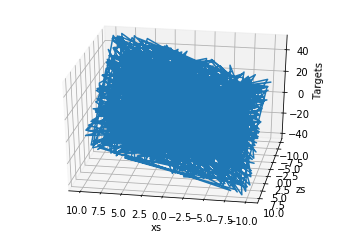

In [4]:
targets = targets.reshape(observations,)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, zs, targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)

plt.show()

targets = targets.reshape(observations,1)

# initialize the variables

In [5]:
init_range = 0.1

weights = np.random.uniform(low=-init_range, high=init_range, size=(2,1))

biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print(weights)
print(biases)

[[-0.0537893 ]
 [ 0.06129344]]
[0.00437808]


# set a learning rate

In [6]:
learning_rate = 0.02

# train the model

In [7]:
for i in range(100):
    
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    

226.67321701860428
41.5500455984406
15.658887127429294
11.697435746827402
10.778559894194139
10.295372189351117
9.886647849211327
9.501757621024096
9.133138915317824
8.779228573098496
8.43931755916353
8.112835095351082
7.799248300639385
7.498047480773483
7.20874337141847
6.930866074587674
6.663964257928823
6.407604416433778
6.161370167604992
5.924861575060573
5.697694498939003
5.479499971972962
5.26992360020834
5.06862498739364
4.875277182104635
4.68956614670626
4.511190247289225
4.339859763752885
4.175296419238692
4.0172329281498245
3.8654125620229953
3.719588732547249
3.5795245910525058
3.4449926438173497
3.315774382571219
3.1916599295908683
3.0724476968146446
2.9579440584209618
2.847963036339085
2.742325998181519
2.640861367107293
2.5434043431449957
2.4497966355228176
2.3598862055709575
2.2735270197787267
2.1905788126053185
2.1109068586589745
2.034381753874508
1.9608792053338124
1.8902798293879177
1.822468957752764
1.7573364512637082
1.694776520986279
1.634687556392626
1.57697196032

In [8]:
print(weights,biases)

[[ 2.0043763]
 [-3.0015994]] [4.32086575]


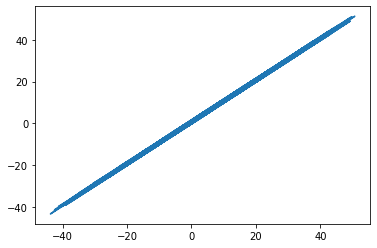

In [9]:
plt.plot(outputs,targets)
plt.show()